### Requirement:
Jan 17, 2017 
- Annotations are Based on: https://docs.google.com/spreadsheets/d/1RM1xmq9noZyzA97Ca3AgdujziyTb-0lwGlTFjWaiJvc/edit?ts=58797bde#gid=0
1. Read the annotations.h5 file (using h5py, etc);
2. Make some simple plot: scatter, heatmap, etc;
3. Obtain statisitcs data from " ACPreprocessingAnnotator" in the tab of Limited Core, such as: neg_high, neg_low pos_high, pos_low, and vmzero.
4. Reference: http://10.21.56.21/docs/ac-analysis/latest/
5. Look at this for Quantile-Quantile Plot using SciPy http://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy
6. More details for the neg_high http://10.21.56.21/docs/ac-analysis/latest/developer/annotations-list.html?highlight=neg_high

In [319]:
import plotly.plotly as py

In [355]:
import os
import numpy as np
import h5py
import time
#import plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [321]:
%%bash
echo -e "We are on the machine: \"`hostname`\"\n"
#cd /home/genia/azhang/GPU_TEST_HOME/data
echo "File structure is:"
pwd
tree
cd ..
ls

We are on the machine: "merge1"

File structure is:
/home/genia/azhang/GPU_TEST_HOME/notebook
.
├── 1.  neg_low-170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1 (Voltage Mode)-For practice numpy.ipynb
├── 1.  neg_low-170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1 (Voltage Mode).ipynb
├── 2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-170214_330.ipynb
├── 2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-Copy_170214.ipynb
├── 2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.ipynb
├── 2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.py
├── 2-Final-neg_low-need-run_name.py
├── 2.  neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-ForPractice.ipynb
├── 2.  neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.ipynb
├── 3.  neg_low-170206_TAG_01_caterpie_WAV07R10C15 (CVC Mode).ipynb
├── 4.  neg_low-170120_SW_03_crobat_WAV05R07C13_cycle1 (CVC Mode) .ipynb
├── 5.  neg_low-170209_SIG-A_01_flareon_WAS23R13C13.ipynb
├── ACAP_Core_Annotations_Test1_voltage-mode.ipynb
├── ACAP_Core_Annotati

## Requirement:
Based on: https://docs.google.com/spreadsheets/d/1RM1xmq9noZyzA97Ca3AgdujziyTb-0lwGlTFjWaiJvc/edit?ts=58797bde#gid=0

#### 1. Read the annotations.h5 file (using h5py, etc);
#### 2. Make some simple plot: heatmap 
#### 3. Obtain statisitcs data from " ACPreprocessingAnnotator" in the tab of Limited Core, such as: neg_high, vmzero. 

In [322]:
%%bash
cd data
pwd
ls

/home/genia/azhang/GPU_TEST_HOME/notebook
1.  neg_low-170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1 (Voltage Mode)-For practice numpy.ipynb
1.  neg_low-170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1 (Voltage Mode).ipynb
2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-170214_330.ipynb
2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-Copy_170214.ipynb
2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.ipynb
2-Final-neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.py
2-Final-neg_low-need-run_name.py
2.  neg_low-170124_SIG-A_03_blastoise_WAV06R05C15-ForPractice.ipynb
2.  neg_low-170124_SIG-A_03_blastoise_WAV06R05C15.ipynb
3.  neg_low-170206_TAG_01_caterpie_WAV07R10C15 (CVC Mode).ipynb
4.  neg_low-170120_SW_03_crobat_WAV05R07C13_cycle1 (CVC Mode) .ipynb
5.  neg_low-170209_SIG-A_01_flareon_WAS23R13C13.ipynb
ACAP_Core_Annotations_Test1_voltage-mode.ipynb
ACAP_Core_Annotations_Test2-CVC-Mode (with one voltage mode).ipynb
test.annotation.py
test.usecase.py
usecase.ipynb
usecase-V1_1

bash: line 1: cd: data: No such file or directory


### Description for the datasets
#### CVC mode:
170120_SW_03_crobat_WAV05R07C13_cycle1 and
170131_TAG_01_krabby_WAV10R07C05
#### valtage mode:
170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1

In [356]:
#filename1="/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/\
#P_00_170110023618_v11.19.1/annotations.h5"

filename1_CVC1="/home/genia/rigdata/crobat/170120_SW_03_crobat_WAV05R07C13_cycle1/\
P_12_170201223402_spore1-master_ac-analysis_v11.21.1/annotations.h5"

filename1_CVC2="/home/genia/azhang/GPU_TEST_HOME/data/170131_TAG_01_krabby_WAV10R07C05/annotations.h5"


anno_one_CVC1 = h5py.File(filename1_CVC1, 'r')
anno_one_CVC2 = h5py.File(filename1_CVC2, 'r')


filename2 = "/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/\
P_00_170110031255_ggc3-keeper_ac-analysis_v11.19.1/annotations.h5"

anno_two = h5py.File(filename2, 'r')
csvname1="170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1/cell_annotations.csv"


# Files on vmlxu2"
#filename1="/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Chuck/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/annotations.h5"
#filename2="/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Chuck/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/annotations.h5"


In [324]:
filename1_CVC1

'/home/genia/rigdata/crobat/170120_SW_03_crobat_WAV05R07C13_cycle1/P_12_170201223402_spore1-master_ac-analysis_v11.21.1/annotations.h5'

In [325]:
filename1_CVC2

'/home/genia/azhang/GPU_TEST_HOME/data/170131_TAG_01_krabby_WAV10R07C05/annotations.h5'

## Look into the structure for the annotations.h5

#### 1) Look into oc_calibration_vmzero: run one vs run two

In [326]:
anno_one_CVC1.keys()  # Same as "h5ls annotations.h5"
#anno_one_CVC2.keys()  # Same as "h5ls annotations.h5"

[u'cells', u'description', u'experiments', u'metadata', u'version']

In [327]:
anno_one_CVC1['experiments'].keys()

[u'activethinning',
 u'drytest',
 u'electroporation',
 u'oc_calibration',
 u'primary',
 u'run_metadata',
 u'srcm']

In [328]:
vmzero_one_CVC1 = anno_one_CVC1['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
vmzero_one_CVC1

array([ nan,  nan,  nan, ...,  nan,  nan,  nan], dtype=float32)

In [329]:
vmzero_one_CVC2 = anno_one_CVC2['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
vmzero_one_CVC2

array([ 59.54895401,  32.80421829,  25.04044151, ...,  78.9467392 ,
        27.2345314 ,  28.30464935], dtype=float32)

In [330]:
# Data set two:
vmzero_two = anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
vmzero_two

array([          nan,  139.41577148,  130.67912292, ...,  117.00022888,
        117.09118652,           nan], dtype=float32)

####  Check the neg_high for all three datasets (two CVC mode and one valtage mode)

In [331]:
neg_high_CVC1 = anno_one_CVC1['experiments/primary/rep_anno/neg_high'].value
neg_high_CVC1

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

In [332]:
neg_high_CVC2 = anno_one_CVC2['/experiments/primary/rep_anno/neg_high'].value
neg_high_CVC2

array([[ 4.16623068,  4.14167881,  4.92570734, ...,  4.96256208,
         5.10992193,  5.10993814],
       [ 1.84970832,  1.84975433,  1.85013688, ...,  1.84969127,
         1.85064411,  1.85303557],
       [ 2.67300463,  2.68293762,  3.64735508, ...,  2.66869545,
         2.66777563,  2.66849399],
       ..., 
       [-4.58375072, -5.08354092,         nan, ...,         nan,
                nan,         nan],
       [-1.64770722, -0.13994412,  0.24080989, ...,  0.24080972,
         0.24083683,  0.2408296 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [333]:
neg_high_two = anno_two['/experiments/primary/rep_anno/neg_high'].value
neg_high_two

array([[         nan],
       [         nan],
       [-13.64763355],
       ..., 
       [         nan],
       [  1.68721139],
       [         nan]], dtype=float32)

### Check other "oc_calibration_vmzero"
/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1
(genia@merge1)\>grep oc_calibration_vmzero whole_parameters

/experiments/oc_calibration/cell_anno/oc_calibration_vmzero Dataset {131072}

/experiments/oc_calibration/metadata/units/annotations/oc_calibration_vmzero Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero Group
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/annotation_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/annotator Dataset {SCALAR}
...
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/experiment_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/name Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/schema_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/units Dataset {SCALAR}


/experiments/oc_calibration/vmzero_start Dataset {1}

/experiments/oc_calibration/vmzero_stop Dataset {1}
/experiments/primary/vmzero_start Dataset {1}
/experiments/primary/vmzero_stop Dataset {1}


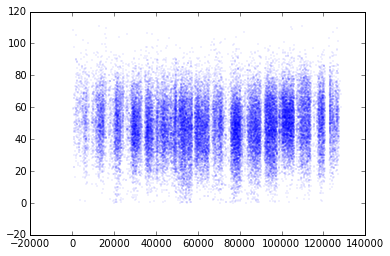

In [334]:
# Scatter plot for vmzero_one_CVC1
plt.scatter(range(vmzero_one_CVC1.size), vmzero_one_CVC1, s=.02, alpha=0.5, color='b')

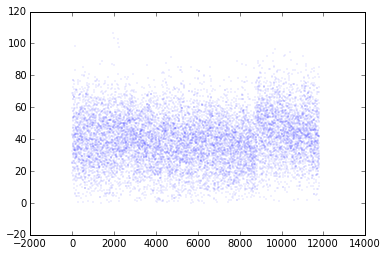

In [335]:
# Scatter plot for vmzero_one_CVC2
plt.scatter(range(vmzero_one_CVC2.size), vmzero_one_CVC2, s=.02, alpha=0.5, color='b')


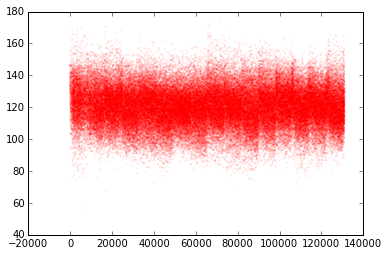

In [336]:
# Scatter plot for vmzero_two
plt.scatter(range(vmzero_two.size), vmzero_two, s=.02, alpha=0.5, color='r')

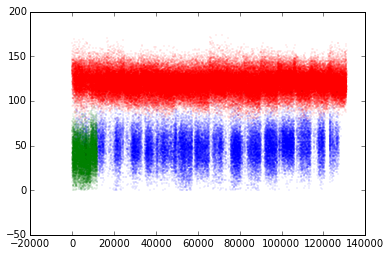

In [337]:

plt.scatter(range(vmzero_one_CVC1.size), vmzero_one_CVC1, s=.02, alpha=0.5, color='b')
plt.scatter(range(vmzero_one_CVC2.size), vmzero_one_CVC2, s=.02, alpha=0.5, color='g')
plt.scatter(range(vmzero_two.size), vmzero_two, s=.02, alpha=0.5, color='r')


In [338]:
## Plog the Histogram:
# 1. Remove nan first:

vmzero_one_CVC1_new = vmzero_one_CVC1[~np.isnan(vmzero_one_CVC1)]
vmzero_one_CVC2_new = vmzero_one_CVC2[~np.isnan(vmzero_one_CVC2)]

vmzero_two_new = vmzero_two[~np.isnan(vmzero_two)]

#vmzero_one_new =[np.logical_not(np.isnan(vmzero_one))]
#print "vmzero_one after remove the nan is: ", vmzero_one_new

#vmzero_two_new =[np.logical_not(np.isnan(vmzero_two))]
#print "vmzero_two after remove the nan is: ", vmzero_two_new
print ("vmzero_one_CVC1_new is: ", vmzero_one_CVC1_new)
print "============"
print ("vmzero_one_CVC2_new is: ", vmzero_one_CVC2_new)
print "============"
print ("vmzero_two_new is: ", vmzero_two_new)


('vmzero_one_CVC1_new is: ', array([  59.30098724,  108.29113007,   58.68998337, ...,   70.53884125,
         68.14842224,   60.38773727], dtype=float32))
('vmzero_one_CVC2_new is: ', array([ 59.54895401,  32.80421829,  25.04044151, ...,  78.9467392 ,
        27.2345314 ,  28.30464935], dtype=float32))
('vmzero_two_new is: ', array([ 139.41577148,  130.67912292,  118.58004761, ...,  117.51531219,
        117.00022888,  117.09118652], dtype=float32))


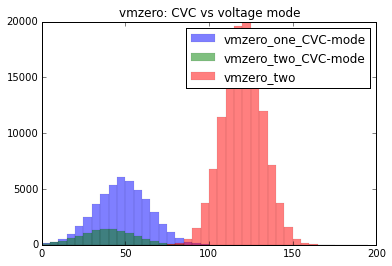

In [339]:

# Plot histogram for vmzero
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(vmzero_one_CVC1_new, bins=np.arange(0,200,5), label = 'vmzero_one_CVC-mode', color='b', alpha=0.5, lw=0.1)
plt.hist(vmzero_one_CVC2_new, bins=np.arange(0,200,5), label = 'vmzero_two_CVC-mode', color='g', alpha=0.5, lw=0.1)

plt.hist(vmzero_two_new, bins=np.arange(0,180,5), label = 'vmzero_two', color='r', alpha=0.5, lw=0.1)
plt.legend()
plt.title("vmzero: CVC vs voltage mode");


#### Feb. 9 Look at 

# Check the following
(Feb. 2, 2017)
The mean of the each value  for the following:
## 1) neg_high, 2) neg_low, 3) pos_high, 4) pos_low, and 5)vmzero.

Y(n) = Y(i) - Mean (Y)

plot and histgram



### 1) neg_high

In [340]:
neg_high_CVC1

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

In [341]:
neg_high_CVC2

array([[ 4.16623068,  4.14167881,  4.92570734, ...,  4.96256208,
         5.10992193,  5.10993814],
       [ 1.84970832,  1.84975433,  1.85013688, ...,  1.84969127,
         1.85064411,  1.85303557],
       [ 2.67300463,  2.68293762,  3.64735508, ...,  2.66869545,
         2.66777563,  2.66849399],
       ..., 
       [-4.58375072, -5.08354092,         nan, ...,         nan,
                nan,         nan],
       [-1.64770722, -0.13994412,  0.24080989, ...,  0.24080972,
         0.24083683,  0.2408296 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

('neg_high_CVC1 before cleanning: ', array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32))
('neg_high after cleanning: ', array([-10.13928318,  -9.29737568,  -9.29459858, ..., -11.77673149,
       -12.79944229, -20.55405235], dtype=float32))


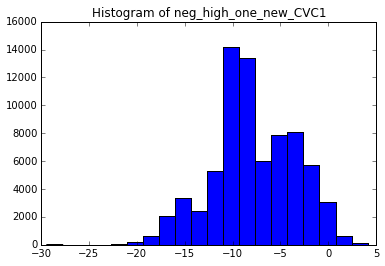

In [342]:
# statistics and histogram for CVC1:
neg_high_new_CVC1 = neg_high_CVC1[~np.isnan(neg_high_CVC1)]
neg_high_new_CVC1
"Mean for neg_high_one_new_CVC1 is:", neg_high_new_CVC1.mean()
"Standard Deviation is: ", neg_high_new_CVC1.std()

print ("neg_high_CVC1 before cleanning: ", neg_high_CVC1)
print ("==================")
print ("neg_high after cleanning: ",neg_high_new_CVC1)
plt.hist(neg_high_new_CVC1, bins = 20, color = 'b')
plt.title("Histogram of neg_high_one_new_CVC1")

('neg_high_CVC2 before cleanning: ', array([[ 4.16623068,  4.14167881,  4.92570734, ...,  4.96256208,
         5.10992193,  5.10993814],
       [ 1.84970832,  1.84975433,  1.85013688, ...,  1.84969127,
         1.85064411,  1.85303557],
       [ 2.67300463,  2.68293762,  3.64735508, ...,  2.66869545,
         2.66777563,  2.66849399],
       ..., 
       [-4.58375072, -5.08354092,         nan, ...,         nan,
                nan,         nan],
       [-1.64770722, -0.13994412,  0.24080989, ...,  0.24080972,
         0.24083683,  0.2408296 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32))
('neg_high after cleanning: ', array([ 4.16623068,  4.14167881,  4.92570734, ...,  0.24080972,
        0.24083683,  0.2408296 ], dtype=float32))


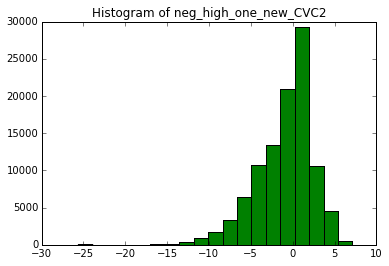

In [343]:
# statistics and histogram for CVC2:
neg_high_new_CVC2 = neg_high_CVC2[~np.isnan(neg_high_CVC2)]
neg_high_new_CVC2
"Mean for neg_high_one_new_CVC2 is:", neg_high_new_CVC2.mean()
"Standard Deviation is: ", neg_high_new_CVC2.std()

print ("neg_high_CVC2 before cleanning: ", neg_high_CVC2)
print ("==================")
print ("neg_high after cleanning: ",neg_high_new_CVC2)
plt.hist(neg_high_new_CVC2, bins = 20, color = 'g')
plt.title("Histogram of neg_high_one_new_CVC2")

('neg_high before cleanning: ', array([[         nan],
       [         nan],
       [-13.64763355],
       ..., 
       [         nan],
       [  1.68721139],
       [         nan]], dtype=float32))
('neg_high after cleanning: ', array([-13.64763355, -13.46699905,  -8.33486843, ...,   1.29357052,
         1.18352103,   1.68721139], dtype=float32))


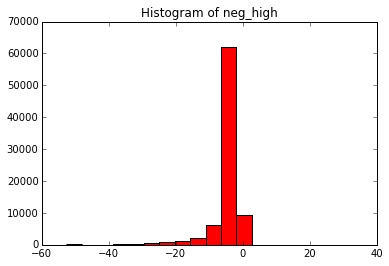

In [344]:
# statistics and histogram for neg_high_two:


#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
neg_high_two_new = neg_high_two[~np.isnan(neg_high_two)]
neg_high_two_new
"Mean for neg_high is:", neg_high_two_new.mean()
"Standard Deviation is: ", neg_high_two_new.std()

print ("neg_high before cleanning: ", neg_high_two)
print ("==================")
print ("neg_high after cleanning: ",neg_high_two_new)
plt.hist(neg_high_two_new, bins = 20, color = 'r')
plt.title("Histogram of neg_high")

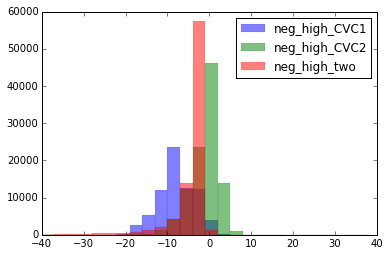

In [345]:
plt.hist(neg_high_new_CVC1, bins=np.arange(-40,40,3), label = 'neg_high_CVC1', color='b', alpha=0.5, lw=0.1)
plt.hist(neg_high_new_CVC2, bins=np.arange(-40,40,3), label = 'neg_high_CVC2', color='g', alpha=0.5, lw=0.1)
plt.hist(neg_high_two_new, bins=np.arange(-40,40,3), label = 'neg_high_two', color='r', alpha=0.5, lw=0.1)
plt.legend()

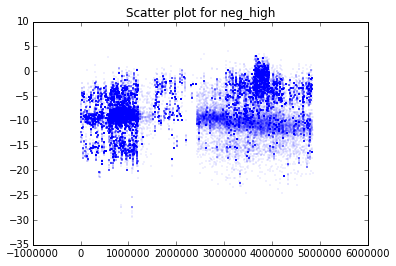

In [346]:
# Scatter plot
plt.scatter(range(neg_high_one.size), neg_high_one, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")

###  Variance, mean, and Y(0...n) =   Y(n) - Y(mean) pot

#### Quantile-Quantile Plot using SciPy

((array([-4.27701362, -4.07518449, -3.96529574, ...,  3.96529574,
          4.07518449,  4.27701362]),
  array([-29.42446709, -29.27105522, -28.5345726 , ...,   3.56183577,
           3.56419396,   4.1243763 ], dtype=float32)),
 (4.3262092536213776, -7.8295555114746076, 0.99302036837753394))

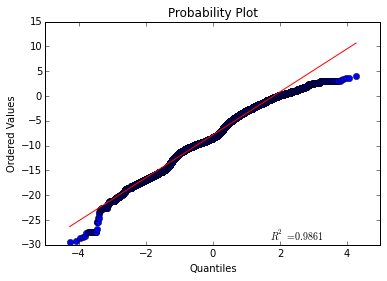

In [349]:
stats.probplot(neg_high_one_new, dist="norm", plot=plt)

#### 2) neg_low

In [353]:
neg_low_one = anno_one['experiments/primary/rep_anno/neg_low'].value
neg_low_one

/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [351]:
# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
neg_low_one_new = neg_low_one[~np.isnan(neg_low_one)]
print ("neg_low_one_new is: ", neg_low_one_new)
print ("==================")
print ("Mean for neg_low is:", neg_low_one_new.mean())
print ("==================")
print ("Standard Deviation is: ", neg_low_one_new.std())
print ("==================")
print ("neg_high_one_new.variance is: ", neg_low_one_new.var())

#print neg_high_one
plt.hist(neg_low_one_new, bins = 20, color='g')
plt.title("Histogram of neg_low")

NameError: name 'neg_low_one' is not defined

### A few statistics summary for neg_low_one

In [ ]:
print ("calc mean, diff, and their plot")
print ("==================================")
print ("neg_low_one_new.mean is:", neg_low_one_new.mean())

print ("==================")


In [ ]:
stats.probplot(neg_low_one_new, dist="norm", plot=plt)

### 3) pos_high 

In [ ]:
pos_high_one = anno_one['experiments/primary/rep_anno/pos_high'].value
pos_high_one 

In [ ]:
# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
pos_high_one_new = pos_high_one[~np.isnan(pos_high_one)]
#print pos_high_one_new
print ("Mean for pos_high is:", pos_high_one_new.mean())
print ("Standard Deviation is: ", pos_high_one_new.std())
#print neg_high_one
plt.hist(pos_high_one_new, bins = 20, color='y')

In [ ]:
#plt.scatter(range(pos_high_one.size), pos_high_one, s=.02, alpha=0.5, color='b')

In [ ]:
stats.probplot(pos_high_one_new, dist="norm", plot=plt)
stats.probplot(pos_low_one_new, dist="norm", plot=plt)
plt.legend()

#### 4. pos_low

In [ ]:
pos_low_one = anno_one['experiments/primary/rep_anno/pos_low'].value
pos_low_one 

In [ ]:
# Remove nan
#pos_low_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
pos_low_one_new = pos_low_one[~np.isnan(pos_low_one)]
print ("pos_low_one_new is: ", pos_low_one_new)
print ("Mean for pos_low is:", pos_low_one_new.mean())
print ("Standard Deviation is: ", pos_low_one_new.std())
plt.hist(pos_low_one_new, bins = 20, color='r')

In [ ]:
# Plot histogram for compare pos_high vs pos_low
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(pos_high_one_new, bins=np.arange(-90,110,10), label = 'pos_high', color='y', alpha=0.5, lw=0.1)
plt.hist(pos_low_one_new, bins=np.arange(-90,120,10), label = 'pos_low', color='r', alpha=0.5, lw=0.1)
plt.legend()
plt.title("pos_high vs pos_low");
plt.xlabel("Value")
plt.ylabel("Frequency")


In [ ]:
stats.probplot(pos_low_one_new, dist="norm", plot=plt)


#### 2-1 Check oc_calibration_neg_low (vs neg_low)

In [ ]:
#neg_low_one = anno_one['experiments/primary/rep_anno/neg_low'].value
print ("neg_low_one is: ", neg_low_one)
print ("===================\n")

# experiments/oc_calibration/cell_anno/oc_calibration_neg_low
oc_calibration_neg_low_one = anno_one['experiments/oc_calibration/cell_anno/oc_calibration_neg_low'].value
print ("oc_calibration_neg_low_one is: ", oc_calibration_neg_low_one)

In [ ]:
# 2After eliminate the "nan"

# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
oc_calibration_neg_low_one_new = oc_calibration_neg_low_one[~np.isnan(oc_calibration_neg_low_one)]
print ("oc_calibration_neg_low_one_new is: ", oc_calibration_neg_low_one_new)
print ("==================")
print ("Mean for oc_calibration_neg_low_one is:", oc_calibration_neg_low_one_new.mean())
print ("==================")
print ("Standard Deviation is: ", oc_calibration_neg_low_one_new.std())
print ("==================")
print ("variance is: ", oc_calibration_neg_low_one_new.var())

#print neg_high_one

plt.hist(oc_calibration_neg_low_one_new, bins = 20, color='g')
plt.title("Histogram of oc_calibration_neg_low_one")




In [ ]:
# run q-q test
stats.probplot(oc_calibration_neg_low_one_new, dist="norm", plot=plt)

In [354]:
# Will this make sense: oc_calibration_neg_low vs neg_low
# Plot histogram for compare pos_high vs pos_low
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(oc_calibration_neg_low_one_new, bins=np.arange(-90,20,5), label = 'oc_calibration_neg_low', color='y', alpha=0.5, lw=0.1)
plt.hist(neg_low_one_new, bins=np.arange(-90, 20,5), label = 'neg_low', color='r', alpha=0.5, lw=0.1)
plt.legend()
plt.title("oc_calibration_neg_low vs neg_low");
plt.xlabel("Value")
plt.ylabel("Frequency")

NameError: name 'oc_calibration_neg_low_one_new' is not defined

### 6) oc_calibration_pos_cycle_decay_range

In [352]:
oc_calibration_pos_cycle_decay_range_one = \
anno_one['experiments/oc_calibration/cell_anno/oc_calibration_pos_cycle_decay_range'].value
print ("oc_calibration_pos_cycle_decay_range_one is: ", oc_calibration_pos_cycle_decay_range_one)

/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Remove nan
oc_calibration_pos_cycle_decay_range_one_new = oc_calibration_pos_cycle_decay_range_one\
[~np.isnan(oc_calibration_pos_cycle_decay_range_one)]
print ("oc_calibration_pos_cycle_decay_range_one_new is: ", \
       oc_calibration_pos_cycle_decay_range_one_new)



In [ ]:
plt.hist(oc_calibration_pos_cycle_decay_range_one_new, bins=2, \
         label = 'oc_calibration_pos_cycle_decay_range_one_new ',\
         color='g', alpha=0.5, lw=0.1)
plt.title("oc_calibration_pos_cycle_decay_range_one_new");
plt.xlabel("Value")
plt.ylabel("Frequency")


In [ ]:
# Scatter plot:
# Scatter plot
plt.scatter(range(oc_calibration_pos_cycle_decay_range_one.size), oc_calibration_pos_cycle_decay_range_one, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")


In [ ]:
# Scatter plot:
# Scatter plot
plt.scatter(range(oc_calibration_pos_cycle_decay_range_one_new.size), \
            oc_calibration_pos_cycle_decay_range_one_new, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")


# Next Steps:
####==================
#### 1)  plot a few histgram to see if if makes more sense for the distribution of the data
#### 2) Find out the physical meanings for each annotations (where the doc is?)
#### 3) More detailed explainations for the data missing, nan, variations for the data source? etc.)
#### 4) More comparisons: chip vs chip; cycles vs cycles withint the same chip, etc) 


### Appendex: for my practice

#### Plot test

In [ ]:
print (randn(10))
plot(randn(10))

### Check the cell_annotations.csv

In [ ]:
%%bash
cd "170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1"
pwd
ls


In [ ]:
%%bash
#cell_annotations = pd.read_csv("cell_annotations.csv")
pwd

In [ ]:
%%bash
pwd

In [ ]:
cell_annotations = pd.read_csv("/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1/cell_annotations.csv")

In [ ]:
cell_annotations.head

In [ ]:
import plotly

In [ ]:
plotly.__version__

In [ ]:
x = np.random.randn(50)
x

In [ ]:
data = [
    go.Histogram(
        x=x
    )
]
data

In [ ]:
import ggplot

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.random.normal(0,1,1000)
numBins = 50
ax.hist(x,numBins,color='g',alpha=0.5)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal
gaussian_numbers = normal(size=100)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt
x = random.sample(range(1000), 50)
xbins = [0, len(x)]
plt.scatter(x, bins=xbins, color = 'blue') 
#Does not make the histogram correct. It counts the occurances of the individual counts. 
print ("x is: ", x)
print ("xbins is: " , xbins)
#plt.plot(x)
#plot works but I need this in histogram format
#plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt
x=[x/100 for x in random.sample(range(10000),100)]
xbins=range(0,len(x))
plt.hist(x, bins=xbins, color='blue')
plt.show()


In [ ]:
xbins
# x

### Scatter plots
A scatter plot displays values for two numerical variables in the same data set. The Matplotlib scatter func on creates a sca er plot. Op onally, we can specify the color and size of the data points in the plot as well as alpha transparency.

### Histograms
Histograms visualize the distribu on of numerical data. Matplotlib has the handy hist func on that graphs histograms. The hist func on has two arguments—the array containing the data and the number of bars.

In [ ]:
abc=3
abc

#print a

In [ ]:
b=[1,2,3]

In [ ]:
import datetime

In [ ]:
datetime.time
print (datetime)

In [ ]:
def add_numbers(a, b):
    """
    Add two num together
    Returns
    -------
    the_sum: type of arguments
    """
    return a + b

In [ ]:
add_numbers??

In [ ]:
add_numbers(3, 30)

In [ ]:
np.*load*?

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

In [ ]:
ax1 = fig.add_sublot(2, 2, 1)

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)

In [ ]:
ax3 = fig.add_subplot(2, 2, 3)

In [ ]:
fig, axes = plt.subplots(2, 3)

In [ ]:
axes

In [ ]:
from numpy.random import randn

In [ ]:
plt.plot(randn(50).cumsum(), 'k--')

In [ ]:

ax1 = fig.add_subplot(2, 2, 1)
plot(np.arange(10))
fig = plt.figure()

In [ ]:
arr = np.arange(20,10)
arr

In [ ]:
data = {i : randn() for i in range(10)}
data
plot(data)